* Name - Nikhil Kulkarni
* College - Pune Institute of Computer Technology, Pune

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
data = pd.read_csv("data.csv", index_col=[0], parse_dates=[0], squeeze=True)

In [9]:
data.head()

,date,dish_id_1
0,2019-01-01,120
1,2019-01-02,316
2,2019-01-03,302
3,2019-01-04,334
4,2019-01-05,189


In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
series_value = data.values
series_value

array([['2019-01-01', 120],
       ['2019-01-02', 316],
       ['2019-01-03', 302],
       ['2019-01-04', 334],
       ['2019-01-05', 189],
       ['2019-01-06', 109],
       ['2019-01-07', 352],
       ['2019-01-08', 361],
       ['2019-01-09', 369],
       ['2019-01-10', 393],
       ['2019-01-11', 345],
       ['2019-01-12', 223],
       ['2019-01-13', 120],
       ['2019-01-14', 353],
       ['2019-01-15', 346],
       ['2019-01-16', 302],
       ['2019-01-17', 365],
       ['2019-01-18', 281],
       ['2019-01-19', 183],
       ['2019-01-20', 163],
       ['2019-01-21', 381],
       ['2019-01-22', 340],
       ['2019-01-23', 324],
       ['2019-01-24', 322],
       ['2019-01-25', 319],
       ['2019-01-26', 102],
       ['2019-01-27', 191],
       ['2019-01-28', 365],
       ['2019-01-29', 363],
       ['2019-01-30', 355],
       ['2019-01-31', 320],
       ['2019-02-01', 365],
       ['2019-02-02', 204],
       ['2019-02-03', 119],
       ['2019-02-04', 353],
       ['2019-02-05'

In [12]:
type(series_value)

numpy.ndarray

In [13]:
data.size

418

In [14]:
data.tail()

,date,dish_id_1
204,2019-07-27,158
205,2019-07-28,73
206,2019-07-29,160
207,2019-07-30,146
208,2019-07-31,178


In [15]:
data.describe()

,dish_id_1
count,209.000000
mean,155.200957
std,97.312037
min,0.000000
25%,85.000000
50%,126.000000
75%,210.000000
max,403.000000


<AxesSubplot:>

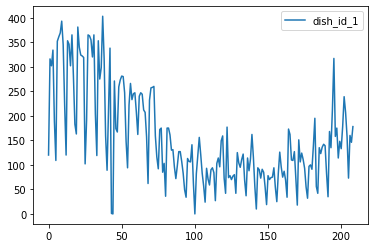

In [16]:
data.plot()

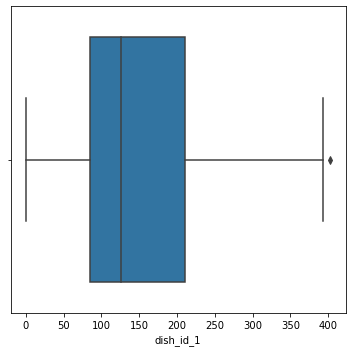

In [18]:
fig, axs = plt.subplots(1, figsize = (5,5))
plt1 = sns.boxplot(data['dish_id_1'])
plt.tight_layout()

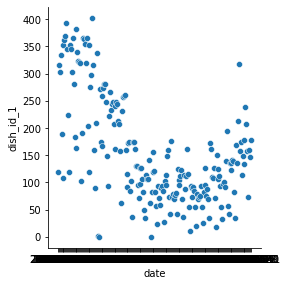

In [19]:
sns.pairplot(data, x_vars="date", y_vars="dish_id_1", height=4, aspect=1, kind="scatter")
plt.show()

In [20]:
type(data)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='date'>

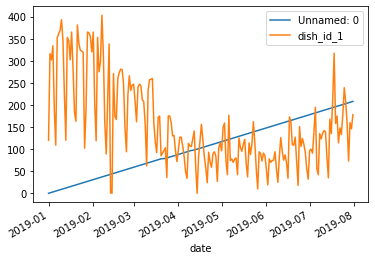

In [22]:
df = pd.read_csv("data.csv",index_col=[1], parse_dates=True, squeeze=True)
df.plot()

In [24]:
data_mean = data.rolling(window=5).mean()

In [25]:
data_mean

,dish_id_1
0,NaN
1,NaN
2,NaN
3,NaN
4,252.2
...,...
204,183.0
205,171.0
206,167.4
207,148.8


<AxesSubplot:>

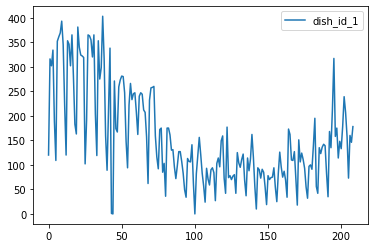

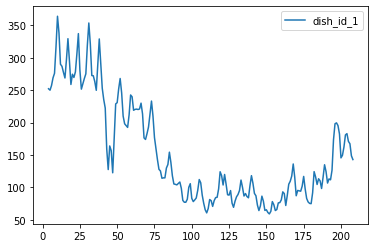

In [27]:
data.plot()
data_mean.plot()

In [28]:
series = pd.DataFrame(series_value)

In [30]:
data_df = pd.concat([series,series.shift(1)], axis=1)

In [31]:
data_df.head()

,0,1,0,1
0,2019-01-01,120,NaN,NaN
1,2019-01-02,316,2019-01-01,120
2,2019-01-03,302,2019-01-02,316
3,2019-01-04,334,2019-01-03,302
4,2019-01-05,189,2019-01-04,334


In [34]:
data_df.columns = ["date1", "Actual_sales", "date2", "Forecast_sales"]

In [35]:
data_df.head()

,date1,Actual_sales,date2,Forecast_sales
0,2019-01-01,120,NaN,NaN
1,2019-01-02,316,2019-01-01,120
2,2019-01-03,302,2019-01-02,316
3,2019-01-04,334,2019-01-03,302
4,2019-01-05,189,2019-01-04,334


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
data_test = data_df[1:]

In [38]:
data_test.head()

,date1,Actual_sales,date2,Forecast_sales
1,2019-01-02,316,2019-01-01,120
2,2019-01-03,302,2019-01-02,316
3,2019-01-04,334,2019-01-03,302
4,2019-01-05,189,2019-01-04,334
5,2019-01-06,109,2019-01-05,189


In [39]:
data_error = mean_squared_error(data_test.Actual_sales, data_test.Forecast_sales)

In [40]:
data_error

5870.961538461538

In [41]:
np.sqrt(data_error)

76.62220003668348

ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

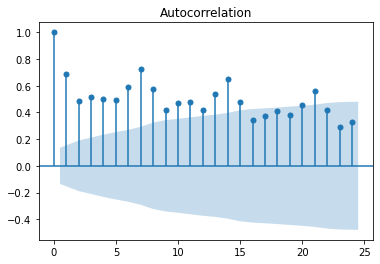

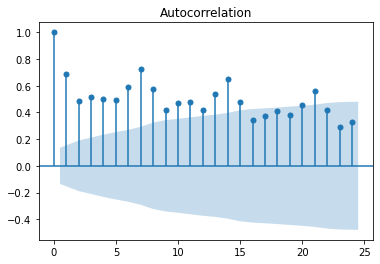

In [44]:
#Plot_acf is to identify parameter Q
# ARIMA(p,d,q)

plot_acf(data.dish_id_1) # To identify value of q

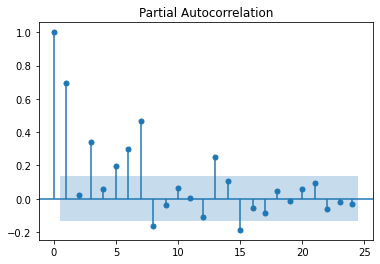

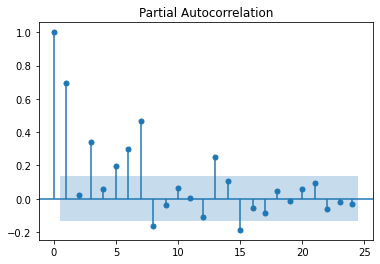

In [45]:
#9,12,16

plot_pacf(data.dish_id_1) # To identify value of p

In [46]:
# p = 2,3    d=0    q= 9,12

data.size

418

In [47]:
data_train = data[0:160]
data_test = data[160:209]

In [48]:
data_train.size

320

In [49]:
data_test.size

98

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [52]:
data_model = ARIMA(data_train.dish_id_1, order=(2,0,9))

In [53]:
data_model_fit = data_model.fit()

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nikhi\anaconda3\lib\sit

In [54]:
data_model_fit.aic

1836.9124308589526

In [56]:
data_forecast = data_model_fit.forecast(steps=49)[1]

In [57]:
data_forecast

array([ 68.22469931,  96.78673026, 104.97794923, 112.72453066,
       120.85127413, 131.80107987, 137.15667921, 146.49804176,
       165.72942012, 178.97043708, 188.41333307, 195.28523318,
       200.35035099, 204.11559676, 206.93101603, 209.04493629,
       210.63684393, 211.83819636, 212.74619726, 213.43322435,
       213.95344711, 214.34756163, 214.64622827, 214.87259497,
       215.0441652 , 215.17418959, 215.27270765, 215.34733056,
       215.40383099, 215.44658834, 215.47892561, 215.50336437,
       215.52181801, 215.53573832, 215.54622669, 215.55411847,
       215.56004711, 215.56449276, 215.56781923, 215.57030205,
       215.57214977, 215.57352014, 215.57453239, 215.57527656,
       215.57582056, 215.57621557, 215.57650007, 215.57670298,
       215.57684598])

In [58]:
data_test

,date,dish_id_1
160,2019-06-13,75
161,2019-06-14,87
162,2019-06-15,69
163,2019-06-16,34
164,2019-06-17,173
165,2019-06-18,162
166,2019-06-19,110
167,2019-06-20,109
168,2019-06-21,127
169,2019-06-22,72


In [62]:
data_train2 = data[0:160]
data_test2 = data[160:216]

In [63]:
data_train2.size

320

In [64]:
data_test2.size

98

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
data_model = ARIMA(data_train2.dish_id_1, order=(2,0,9))

In [68]:
data_model_fit = data_model.fit()

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\nikhi\anaconda3\lib\sit

In [69]:
data_model_fit.aic

1836.9124308589526

In [70]:
data_forecast = data_model_fit.forecast(steps=49)[1]

In [71]:
data_forecast

array([ 68.22469931,  96.78673026, 104.97794923, 112.72453066,
       120.85127413, 131.80107987, 137.15667921, 146.49804176,
       165.72942012, 178.97043708, 188.41333307, 195.28523318,
       200.35035099, 204.11559676, 206.93101603, 209.04493629,
       210.63684393, 211.83819636, 212.74619726, 213.43322435,
       213.95344711, 214.34756163, 214.64622827, 214.87259497,
       215.0441652 , 215.17418959, 215.27270765, 215.34733056,
       215.40383099, 215.44658834, 215.47892561, 215.50336437,
       215.52181801, 215.53573832, 215.54622669, 215.55411847,
       215.56004711, 215.56449276, 215.56781923, 215.57030205,
       215.57214977, 215.57352014, 215.57453239, 215.57527656,
       215.57582056, 215.57621557, 215.57650007, 215.57670298,
       215.57684598])

In [72]:
data_test2

,date,dish_id_1
160,2019-06-13,75
161,2019-06-14,87
162,2019-06-15,69
163,2019-06-16,34
164,2019-06-17,173
165,2019-06-18,162
166,2019-06-19,110
167,2019-06-20,109
168,2019-06-21,127
169,2019-06-22,72
